# 4.10.3 Additional Visualizations

# Contents List

### 01 Import Libraries

Create Path

### 02 Import Data 

Importing "df_FINAL.pkl"

### 03 Visualizations

1) Create bar chart for number of orders by department

2) Create DF and chart for top 10 items in produce department

3) Create chart for average 'days since prior order' grouped by customer loyalty


4) Create chart showing  orders by days of week grouped by loyalty 

5) Create chart for number of orders in each department grouped by loyalty flag

6) Create chart of percentage of orders by department grouped by loyalty status

7) Create chart of percentage of orders by department grouped by customer region

8) Create chart of average item price purchased grouped by customer region

## 01 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path Import
path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/4. Python/Instacart Basket Analysis 2023' 

## 02 Import Data 

In [3]:
# final data import
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_FINAL.pkl'))

## 03 Visualizations 

### 1) Create bar chart for number of orders by department

In [4]:
df['department'].shape

(30964564,)

In [5]:
# Create data for count of orders by department
df['department'].value_counts(dropna=False).sort_values(ascending=False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

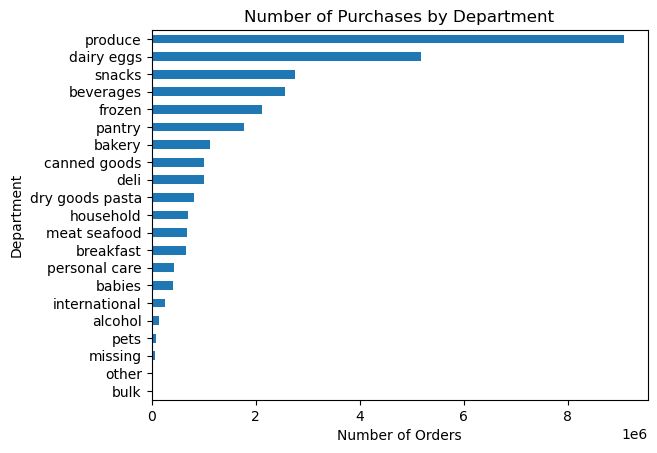

In [6]:
# Create horizontal bar chart of count of departments by department. Sort in ascending order.
purchases_by_department=df['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(
    title='Number of Purchases by Department',
    xlabel= 'Number of Orders',
    ylabel= 'Department'
)

In [7]:
# export scatterplot_age_income
purchases_by_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'purchases_by_department.png'))

### 2) Create DF and chart for top 10 items in produce department

In [8]:
#use loc function to create df_produce
df_produce = df.loc[df['department']=='produce']

In [9]:
df_produce.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,activity_flag,age_group,income_group,department,department_flag,dependants_flag,family_flag,family_flag_detailed,family_flag_income,family_flag_age
11215346,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,Active customer,18-33,Low,produce,None,Has dependants,"Married woman, has children","Married woman, has children, low income","Low income, married woman, has children","Young, married woman, has children"
11215347,431534,1,5,4,15,28.0,13176,8,1,Bag of Organic Bananas,...,Active customer,18-33,Low,produce,None,Has dependants,"Married woman, has children","Married woman, has children, low income","Low income, married woman, has children","Young, married woman, has children"
11215348,431534,1,5,4,15,28.0,10326,5,0,Organic Fuji Apples,...,Active customer,18-33,Low,produce,None,Has dependants,"Married woman, has children","Married woman, has children, low income","Low income, married woman, has children","Young, married woman, has children"
11215349,431534,1,5,4,15,28.0,17122,6,0,Honeycrisp Apples,...,Active customer,18-33,Low,produce,None,Has dependants,"Married woman, has children","Married woman, has children, low income","Low income, married woman, has children","Young, married woman, has children"
11215350,431534,1,5,4,15,28.0,41787,7,0,Bartlett Pears,...,Active customer,18-33,Low,produce,None,Has dependants,"Married woman, has children","Married woman, has children, low income","Low income, married woman, has children","Young, married woman, has children"


In [10]:
# Create top_10 dataframe for top 10 produce items
top_10 = (df_produce['product_name'].value_counts()).iloc[:10]

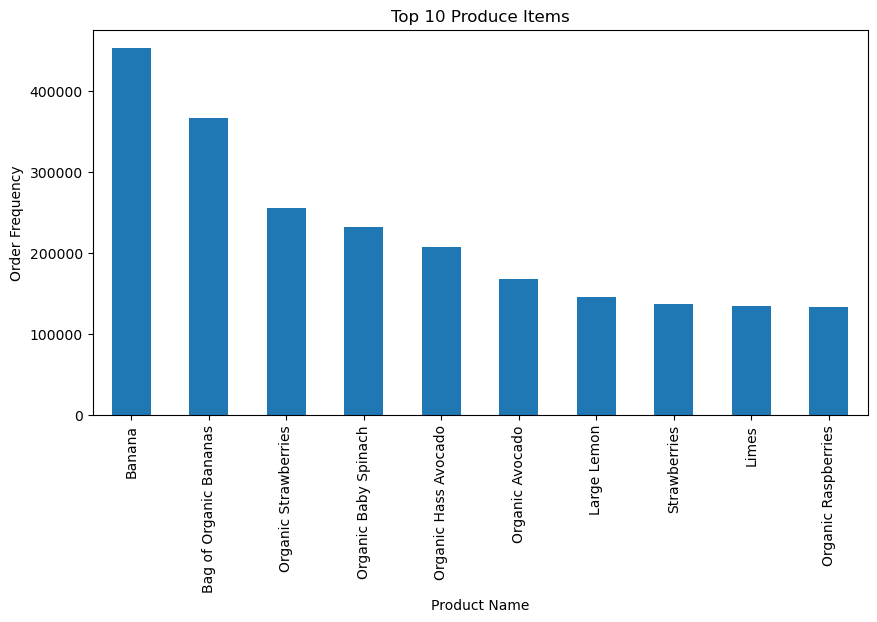

In [11]:
#create bar chart of top 10 products in produce
fig = plt.figure(figsize=(10,5))
top_10_produce = top_10.plot(kind='bar')
plt.xlabel('Product Name')
plt.ylabel('Order Frequency')
plt.title('Top 10 Produce Items')
plt.show()

In [12]:
# export top_10_produce
top_10_produce.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_10_produce.png'))

### 3) Create chart for average 'days since prior order' grouped by customer loyalty

In [13]:
# Determine the average number of days since prior order for each customer loyalty grouping
mean_median = df.groupby('loyalty_flag')['days_since_prior_order'].agg(['mean', 'median'])

In [14]:
sorted_mean = mean_median.sort_values(by='mean', ascending=False)

In [15]:
sorted_mean

,mean,median
loyalty_flag,,
New customer,15.116671,13.0
Regular customer,11.546425,9.0
Loyal customer,5.916068,5.0


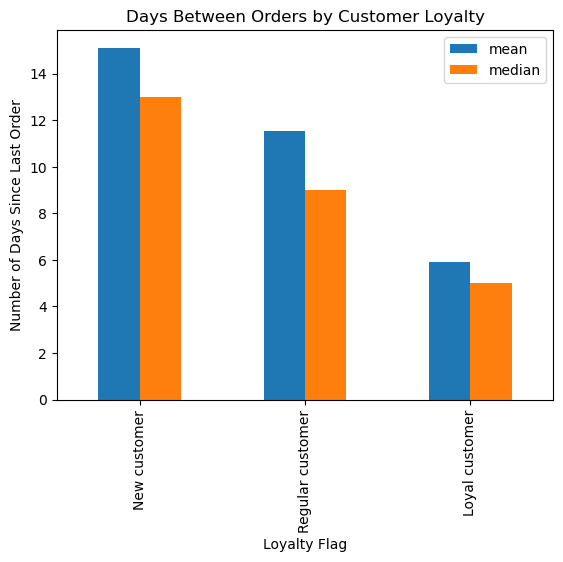

In [16]:
loyalty_days_between=sorted_mean.plot.bar(
    title='Days Between Orders by Customer Loyalty',
    xlabel= 'Loyalty Flag',
    ylabel= 'Number of Days Since Last Order'
)

In [17]:
# export loyalty_days_between
loyalty_days_between.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_days_between.png'))

### 4) Create chart showing  orders by days of week grouped by loyalty 

In [18]:
#Group by customer loyalty
df.groupby('loyalty_flag').agg({'orders_day_of_week':['mean']})

,orders_day_of_week
,mean
loyalty_flag,
Loyal customer,2.791642
New customer,2.701337
Regular customer,2.720970


In [19]:
#Create a crosstab
crosstab = pd.crosstab(df['loyalty_flag'], df['orders_day_of_week'], dropna=False)

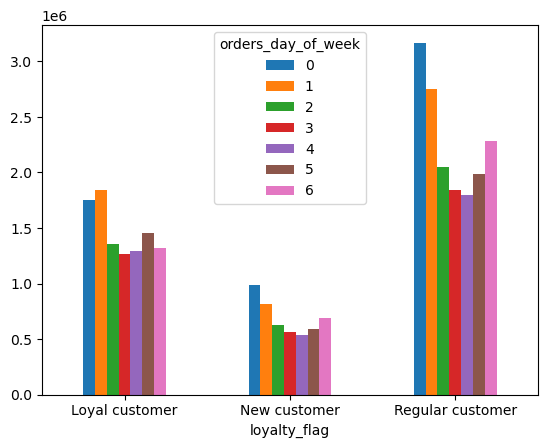

In [20]:
#Creating barplot
barplot = crosstab.plot.bar(rot=0)

In [21]:
#Export the barchart
barplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_orders_day_of_week.png'))

### 5) Create chart for number of orders in each department grouped by loyalty flag

In [22]:
# Create crosstab for number of orders by loyalty flag
loyalty_cross = pd.crosstab(df['department'], df['loyalty_flag'], dropna=False)

In [23]:
loyalty_cross['total'] = loyalty_cross.sum(axis=1)

In [24]:
# Sort crosstab
loyalty_cross_sorted = loyalty_cross.sort_values(by='total', ascending=True)

In [25]:
# Omit total column so it doesn't show up in chart
loyalty_cross_sorted = loyalty_cross_sorted[['Loyal customer', 'New customer', 'Regular customer']]

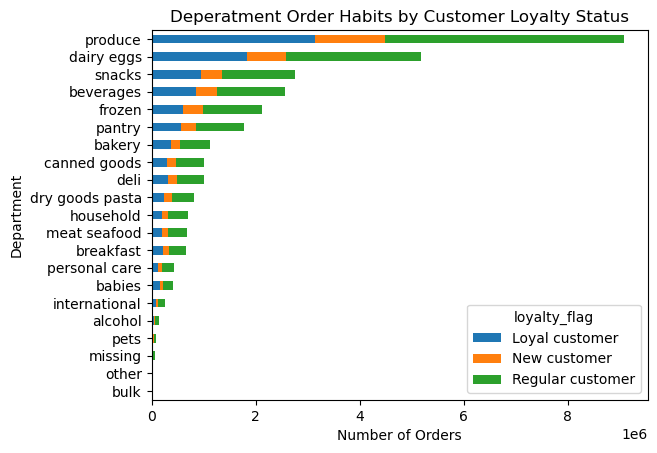

In [26]:
loyalty_department=loyalty_cross_sorted.plot.barh(
    stacked=True,
    title= 'Deperatment Order Habits by Customer Loyalty Status',
    xlabel= 'Number of Orders',
    ylabel= 'Department'
)

In [27]:
# export loyalty_department
loyalty_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_department.png'))

In [28]:
loyalty_cross_sorted

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
bulk,13834,4149,15468
other,10715,5839,17857
missing,18350,12713,33705
pets,25469,15880,51711
alcohol,38723,28629,77275
international,78394,43841,133756
babies,167108,46708,196576
personal care,123365,75442,225499
breakfast,221577,106179,343094


### 6) Create chart of percentage of orders by department grouped by loyalty status

In [29]:
# Create crosstab of percentage of orders by department grouped by loyalty status

cross_normalize = pd.crosstab(df['department'], df['loyalty_flag'], normalize='columns')

In [30]:
cross_percentage = cross_normalize*100

In [31]:
cross_percentage

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,0.376533,0.595979,0.486717
babies,1.624917,0.972335,1.238136
bakery,3.693792,3.582742,3.582913
beverages,8.313976,8.257165,8.315511
breakfast,2.154560,2.210361,2.160980
bulk,0.134518,0.086371,0.097425
canned goods,2.864560,3.751196,3.384088
dairy eggs,17.801346,15.614147,16.353566
deli,3.150944,3.296109,3.284376


In [32]:
# Sort crosstab

cross_percentage_sorted = cross_percentage.sort_values(by='Regular customer', ascending=True)

In [33]:
cross_percentage_sorted

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
bulk,0.134518,0.086371,0.097425
other,0.104190,0.121552,0.112472
missing,0.178431,0.264650,0.212291
pets,0.247654,0.330579,0.325702
alcohol,0.376533,0.595979,0.486717
international,0.762284,0.912652,0.842463
babies,1.624917,0.972335,1.238136
personal care,1.199571,1.570499,1.420307
breakfast,2.154560,2.210361,2.160980


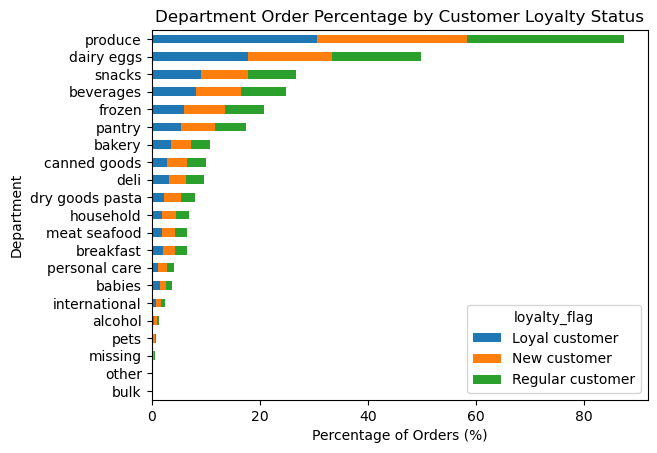

In [34]:
# Plot cross_percentage_sorted

percentage_department_loyalty=cross_percentage_sorted.plot.barh(
    stacked=True,
    title= 'Department Order Percentage by Customer Loyalty Status',
    xlabel= 'Percentage of Orders (%)',
    ylabel= 'Department'
)

In [35]:
cross_percentage_sorted

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
bulk,0.134518,0.086371,0.097425
other,0.104190,0.121552,0.112472
missing,0.178431,0.264650,0.212291
pets,0.247654,0.330579,0.325702
alcohol,0.376533,0.595979,0.486717
international,0.762284,0.912652,0.842463
babies,1.624917,0.972335,1.238136
personal care,1.199571,1.570499,1.420307
breakfast,2.154560,2.210361,2.160980


In [36]:
# export percentage_department_loyalty
percentage_department_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'percentage_department_loyalty.png'))

### 7) Create chart of percentage of orders by department grouped by customer region

In [37]:
# Create crosstab of percentage of orders by department grouped by customer region

cross_region = pd.crosstab(df['department'], df['region'], normalize='columns')

In [38]:
# Make it percentage by multiplying by 100

cross_region = cross_region*100

In [39]:
cross_region['total'] = cross_region.sum(axis=1)

cross_region

region,Midwest,Northeast,South,West,total
department,,,,,
alcohol,0.468814,0.457794,0.473401,0.463643,1.863651
babies,1.318472,1.330580,1.353013,1.292104,5.294168
bakery,3.604662,3.647054,3.604064,3.635004,14.490783
beverages,8.248680,8.471284,8.334860,8.206829,33.261654
breakfast,2.150447,2.157563,2.164378,2.190161,8.662548
bulk,0.109192,0.102458,0.108426,0.110291,0.430367
canned goods,3.270104,3.237808,3.272752,3.282623,13.063287
dairy eggs,16.697484,16.736848,16.710239,16.740532,66.885104
deli,3.228859,3.264561,3.235530,3.246432,12.975382


In [40]:
# Sort crosstab

cross_region_sorted = cross_region.sort_values(by='total', ascending=True)

In [41]:
# Omit total column so it doesn't show up in chart

cross_region_sorted = cross_region_sorted[['Midwest', 'Northeast', 'South', 'West']]

In [42]:
#Create crosstab datatable sorted

cross_region_sorted

region,Midwest,Northeast,South,West
department,,,,
bulk,0.109192,0.102458,0.108426,0.110291
other,0.109936,0.114700,0.112296,0.108247
missing,0.214322,0.210662,0.211296,0.200650
pets,0.294126,0.324520,0.290065,0.303498
alcohol,0.468814,0.457794,0.473401,0.463643
international,0.835446,0.817577,0.820947,0.832548
babies,1.318472,1.330580,1.353013,1.292104
personal care,1.382604,1.368148,1.381962,1.345325
breakfast,2.150447,2.157563,2.164378,2.190161


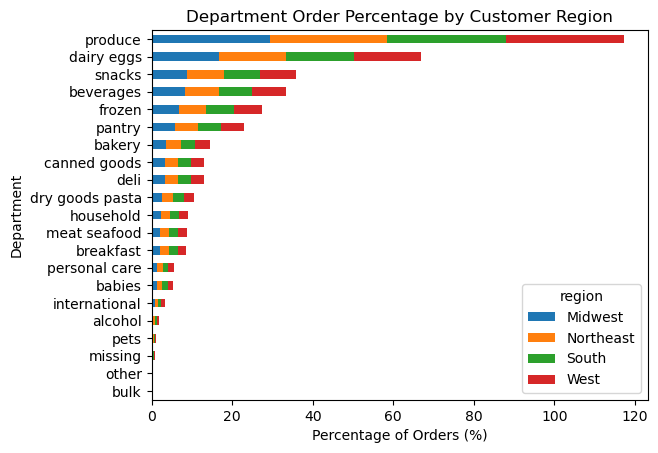

In [43]:
# Plot cross_region_sorted

region_departments_percentage=cross_region_sorted.plot.barh(
    stacked= True,
    title= 'Department Order Percentage by Customer Region',
    xlabel= 'Percentage of Orders (%)',
    ylabel= 'Department'
)

In [44]:
# export percentage_department_loyalty
region_departments_percentage.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_departments_percentage.png'))

### 8) Create chart of average item price purchased grouped by customer region

In [45]:
price_region = df.groupby('region')['prices'].mean()
price_region = price_region.round(2)
price_region = price_region.sort_values(ascending=False)
price_region

region
Midwest      12.68
South        12.12
Northeast    11.54
West         11.28
Name: prices, dtype: float64

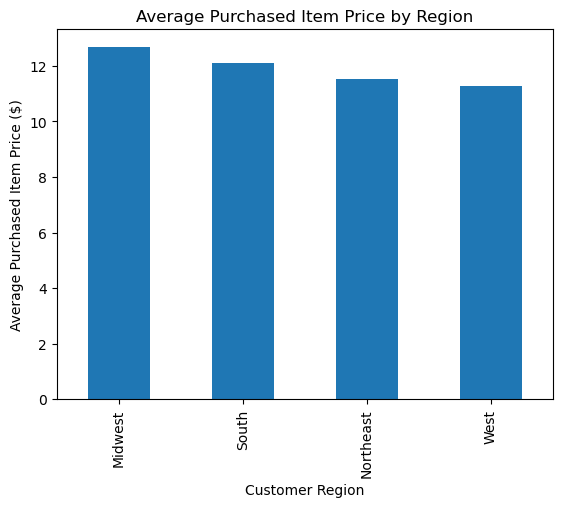

In [46]:
avg_price_region=price_region.plot.bar(
    title= 'Average Purchased Item Price by Region',
    xlabel= 'Customer Region',
    ylabel= 'Average Purchased Item Price ($)'
)

### 8) Create a chart of number of customers by age group

In [47]:
# Number of customers by age group

df['age_group'].value_counts(dropna=False)

age_group
34-49    7790824
18-33    7757465
65+      7730834
50-65    7685441
Name: count, dtype: int64

In [48]:
# Create crosstab of percentage of orders by department grouped by age group

cross_age = pd.crosstab(df['department'], df['age_group'], normalize='columns')
cross_age = cross_age*100

In [49]:
cross_age_sorted = cross_age.sort_values(by='18-33', ascending=True)
cross_age_sorted

age_group,18-33,34-49,50-65,65+
department,,,,
bulk,0.109288,0.109488,0.105485,0.107828
other,0.115128,0.108037,0.113370,0.108009
missing,0.214477,0.210940,0.205466,0.205735
pets,0.309495,0.287428,0.298057,0.307224
alcohol,0.492429,0.460709,0.466375,0.448736
international,0.835943,0.831375,0.821618,0.817855
babies,1.305955,1.376222,1.323307,1.295617
personal care,1.364002,1.374104,1.389237,1.353942
meat seafood,2.168376,2.164110,2.175477,2.208985


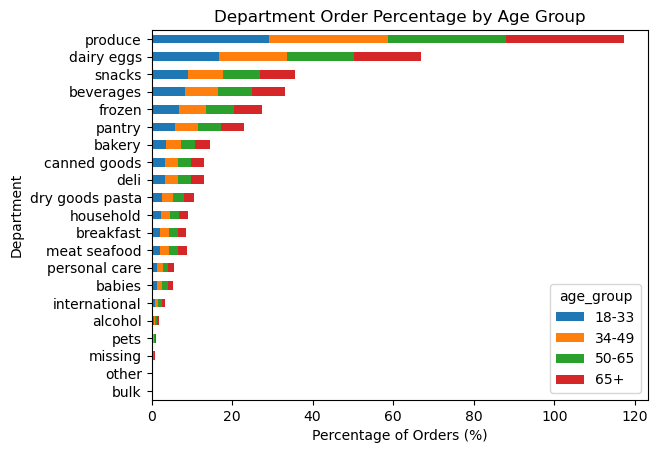

In [50]:
# Create a chart from the crosstab

age_department=cross_age_sorted.plot.barh(
    stacked= True,
    title= 'Department Order Percentage by Age Group',
    xlabel= 'Percentage of Orders (%)',
    ylabel= 'Department'
)

In [51]:
# export age_department
age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department.png'))

### Create chart showing department spending per demographic

In [52]:
#Create a crosstab for customer-profile to department_name
cross_fam = pd.crosstab(df['department'], df['family_flag'], dropna=False)

In [53]:
# Create crosstab of percentage of orders by department grouped by family_flag

cross_fam_normalize = pd.crosstab(df['department'], df['family_flag'], normalize='columns')

In [54]:
cross_percentage_fam = cross_fam_normalize*100

In [55]:
cross_percentage_fam

family_flag,"Married man, has children","Married woman, has children","Single man, has children","Single man, no children","Single woman, has children","Single woman, no children"
department,,,,,,
alcohol,0.428965,0.485913,0.606524,0.469573,0.522958,0.482106
babies,1.340586,1.305293,1.336860,1.361855,1.278788,1.308069
bakery,3.583322,3.644473,3.607860,3.659996,3.641774,3.611347
beverages,8.291953,8.333400,8.027366,8.319683,8.056099,8.356593
breakfast,2.154827,2.179657,2.224273,2.154404,2.259196,2.146317
bulk,0.109009,0.110078,0.112989,0.100969,0.107383,0.105772
canned goods,3.299382,3.254633,3.367230,3.268281,3.174096,3.218141
dairy eggs,16.704982,16.707909,16.793119,16.655803,16.996556,16.792392
deli,3.224856,3.235320,3.213190,3.277144,3.285902,3.270444


In [56]:
cross_percentage_fam_sorted=cross_percentage_fam.sort_values(by='Married man, has children', ascending=False)

In [57]:
cross_percentage_fam_sorted

family_flag,"Married man, has children","Married woman, has children","Single man, has children","Single man, no children","Single woman, has children","Single woman, no children"
department,,,,,,
produce,29.388881,29.231968,29.101394,29.373617,29.031919,29.425887
dairy eggs,16.704982,16.707909,16.793119,16.655803,16.996556,16.792392
snacks,8.916356,8.971111,8.905934,8.886978,8.822708,8.954735
beverages,8.291953,8.333400,8.027366,8.319683,8.056099,8.356593
frozen,6.851438,6.848040,7.016009,6.853742,6.888012,6.824979
pantry,5.761168,5.763616,5.736171,5.781963,5.858127,5.688618
bakery,3.583322,3.644473,3.607860,3.659996,3.641774,3.611347
canned goods,3.299382,3.254633,3.367230,3.268281,3.174096,3.218141
deli,3.224856,3.235320,3.213190,3.277144,3.285902,3.270444


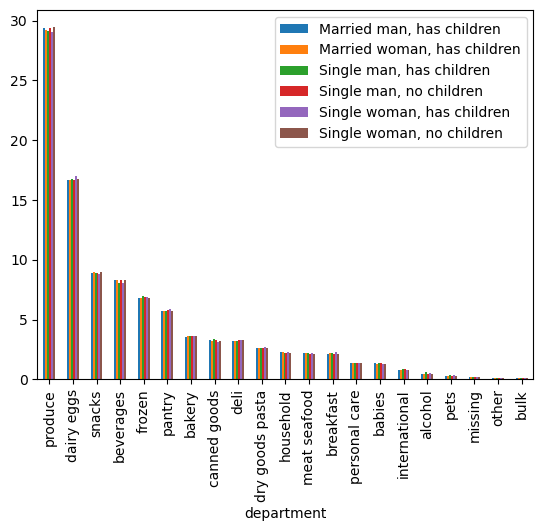

In [58]:
#Creating barplot
barplot_7 = cross_percentage_fam_sorted.plot.bar(style=['o', 'rx'])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [59]:
#Creating barplot_sorted
barplot_6_sorted = crosstab_6_sorted.plot.bar(style=['o', 'rx'])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

NameError: name 'crosstab_6_sorted' is not defined

In [ ]:
line_hour_price = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')
plt.xlabel("Order Hour of Day", fontsize=12)
plt.ylabel("Prices", fontsize=12)  
plt.title("Prices by Order Hour of Day", fontsize=15)

In [ ]:
#Create a crosstab for order_hour_of_day and prices
cross_orderhour = pd.crosstab(df['order_hour_of_day'], df['prices'], dropna=False)

In [ ]:
cross_orderhour

In [ ]:
# create subset with relevant columns max_order and price
orderhourprices_stats = df[['order_hour_of_day', 'order_id', 'prices']]

In [ ]:
# data
orderhourprices_stats.groupby('order_hour_of_day').agg({'prices': ['min', 'mean', 'max']})

In [ ]:
df['prices'].min()

In [ ]:
df['prices'].mean()